<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Bias_and_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve, train_test_split, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

In [2]:
#Prepare dataset

# Load pre-split dataset provided by exercise
data = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Datasets/data/ml-ex5/ex5data1.mat')

In [3]:
# Training set
X_train_0 = data['X']
y_train_0 = data['y']

# Validation set
X_cval_0 = data['Xval']
y_cval_0 = data['yval']

# Test set
X_test_0 = data['Xtest']
y_test_0 = data['ytest']

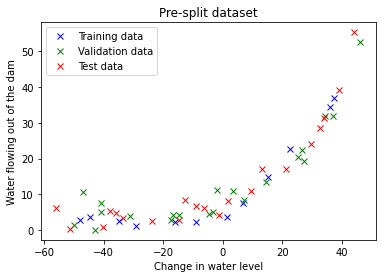

In [4]:
# Plot the three pre-split datasets
plt.plot(X_train_0, y_train_0, 'bx', label='Training data')
plt.plot(X_cval_0, y_cval_0, 'gx', label='Validation data')
plt.plot(X_test_0, y_test_0, 'rx', label='Test data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Pre-split dataset')
plt.legend()

In [5]:
# Number of training data
X_train_0.shape[0]

12

In [6]:
# Number of validation data
X_cval_0.shape[0]

21

In [7]:
# Number of test data
X_test_0.shape[0]

21

In [8]:
# Concatenate pre-split datasets into a single dataset
# (use scikit-learn utilities later to split datasets).
X = np.concatenate([X_train_0, X_cval_0, X_test_0])
y = np.concatenate([y_train_0, y_cval_0, y_test_0]).ravel()

In [9]:
# Randomly split into training and test set. Test set size = 21.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=21, random_state=42)

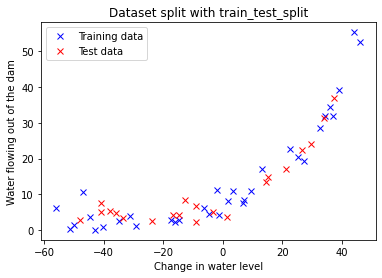

In [10]:
# Plot the datasets obtained with train_test_split
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(X_test, y_test, 'rx', label='Test data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Dataset split with train_test_split')
plt.legend()

In [11]:
#Utility functions

# Plot training data and predictions by a trained model
def plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, title=''):
    plt.plot(X_train, y_train, 'bx', label='Training data')
    plt.plot(X_pred, y_pred, 'b--', label='Prediction')
    plt.xlabel('Change in water level')
    plt.ylabel('Water flowing out of the dam')
    plt.title(title)
    plt.legend()
    
# Plot learning curves obtained by training on different training set sizes
def plot_learning_curves(train_sizes, train_scores, test_scores, y_min=-1, y_max=1, title=''):
    plt.plot(train_sizes, train_scores, 'b-', label='Training score')
    plt.plot(train_sizes, test_scores, 'g-', label='Test score (CV)')

    plt.grid(True, axis='y')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.xlim(xmin=1)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.legend()

# Generate learning curves by training regressor on different training set sizes
def compute_learning_curves(regressor, X_train, y_train, test_size):
    # Train/test split using test_size examples
    cv = ShuffleSplit(n_splits=50, test_size=test_size, random_state=0)
    # Relative training set sizes
    train_sizes_rel = np.linspace(.1, 1.0, 10)
    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=cv, train_sizes=train_sizes_rel)
    # Return training set sizes and average learning values
    return [train_sizes, np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)]

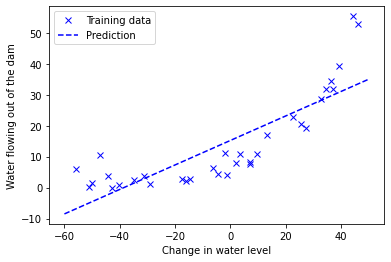

In [12]:
#Linear Regression

# Linear regression with default regularization strength (alpha=1.0)
alpha = 1.0

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

X_pred = np.array([[-60], [50]])
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

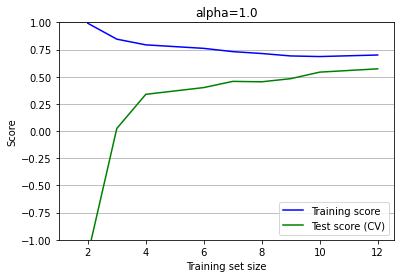

In [13]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')

In [14]:
# Score on test set
model.score(X_test, y_test)

0.6008412749978652

In [15]:
#Polynomial regression

# Creates a linear regressor with given regularization strength alpha.
# Ploynomial features of degree 8 are added and scaled before running
# regulaized linear regression.
def regressor(alpha):
    return Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=8)), 
        ('scaler', StandardScaler()), 
        ('lreg', Ridge(alpha=alpha))
    ])

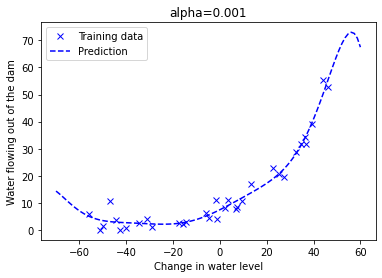

In [16]:
#Overfit example

alpha = 0.001

model = regressor(alpha=alpha)
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

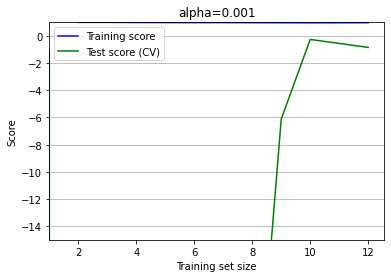

In [17]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, y_min=-15, title=f'alpha={alpha}')

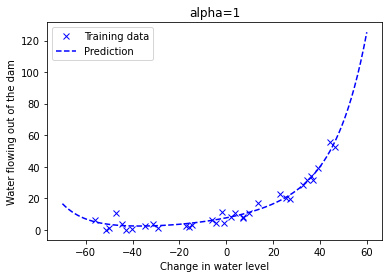

In [18]:
#Good fit example

alpha = 1

model = regressor(alpha=alpha)
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

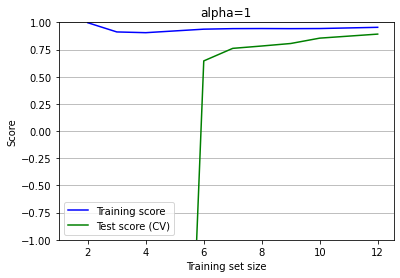

In [19]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')

In [20]:
# Score on test set
model.score(X_test, y_test)

0.9520757860053533

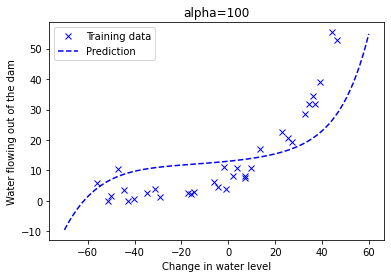

In [21]:
#Underfit example

alpha = 100

model = regressor(alpha=alpha)
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

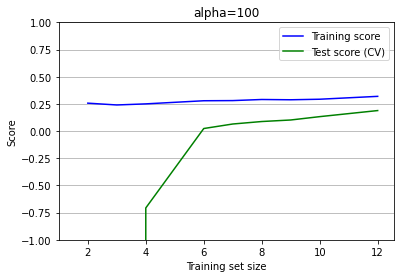

In [22]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')

In [23]:
# Score on test set
model.score(X_test, y_test)

0.4516618676909657